In [1]:
# 環境セットアップ
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# プロジェクトルートをパスに追加
sys.path.append('..')

# モジュールのインポート
from scrapers.weather_scraper import WeatherScraper
from database.db_manager import WeatherTrafficDatabase
from analysis.analyzer import WeatherTrafficAnalyzer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 表示設定
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')

print("Setup complete!")

Setup complete!


In [2]:
# スクレイパーの初期化テスト
scraper = WeatherScraper(delay=2.0)
print("スクレイパーの初期化成功！")
print(f"利用可能な地点: {list(scraper.LOCATIONS.keys())}")

INFO:scrapers.weather_scraper:WeatherScraper initialized with 2.0s delay


スクレイパーの初期化成功！
利用可能な地点: ['東京', '大阪', '名古屋', '札幌', '福岡']


In [3]:
db = WeatherTrafficDatabase('../data/weather_traffic.db')
stats = db.get_statistics()
print("データベースの初期化成功！")
print(f"統計情報: {stats}")

INFO:database.db_manager:Database initialized at ../data/weather_traffic.db


データベースの初期化成功！
統計情報: {'weather_records': 0, 'traffic_records': 0, 'weather_date_range': (None, None), 'traffic_date_range': (None, None)}


In [4]:
# 2023年1月のデータを取得
print("データ取得開始...")
print("⏰ 約2分かかります。サーバー負荷に配慮して2秒ごとにリクエストしています。")

weather_data = scraper.scrape_daily_data(
    location_name='東京',
    year=2023,
    month=1
)

print(f"\n✅ 取得完了: {len(weather_data)}件")

# データの確認
df = pd.DataFrame(weather_data)
df.head()

INFO:scrapers.weather_scraper:Scraping 東京 - 2023/01


データ取得開始...
⏰ 約2分かかります。サーバー負荷に配慮して2秒ごとにリクエストしています。


INFO:scrapers.weather_scraper:Successfully scraped 31 records



✅ 取得完了: 31件


,location_code,location_name,date,avg_temp,max_temp,min_temp,precipitation,max_wind_speed,sunshine_hours,avg_humidity
0,44-47662,東京,2023-01-01,6.6,13.0,0.9,1.7,None,None,None
1,44-47662,東京,2023-01-02,6.2,12.1,2.0,2.1,None,None,None
2,44-47662,東京,2023-01-03,5.8,11.0,0.5,2.2,None,None,None
3,44-47662,東京,2023-01-04,5.6,11.0,1.3,2.6,None,None,None
4,44-47662,東京,2023-01-05,5.9,10.6,2.6,3.2,None,None,None


In [5]:
# データベースに保存
inserted = db.insert_weather_data(weather_data)
print(f"✅ {inserted}件のデータを保存しました")

# 統計情報を再確認
stats = db.get_statistics()
print(f"\n📊 データベース統計:")
for key, value in stats.items():
    print(f"  {key}: {value}")

INFO:database.db_manager:Inserted 31 weather records


✅ 31件のデータを保存しました

📊 データベース統計:
  weather_records: 31
  traffic_records: 0
  weather_date_range: ('2023-01-01', '2023-01-31')
  traffic_date_range: (None, None)


In [6]:
# 国交省の実際の交通量データを読み込み
import pandas as pd

# CSVファイルのパス
csv_path = '../data/raw/zkntrf13.csv'

print("📂 交通量データを読み込んでいます...")

try:
    # 国交省のCSVはShift-JISエンコーディング
    df_traffic_raw = pd.read_csv(csv_path, encoding='shift-jis')
    
    print(f"✅ CSVファイル読み込み成功: {len(df_traffic_raw)}行")
    print(f"\n📊 列名:")
    print(df_traffic_raw.columns.tolist())
    
    # 最初の数行を確認
    print(f"\n📋 最初の3行:")
    df_traffic_raw.head(3)
    
except FileNotFoundError:
    print("❌ ファイルが見つかりません")
    print(f"確認してください: {csv_path}")
    print("\n以下の手順で配置してください:")
    print("1. https://www.mlit.go.jp/road/census/r3/ にアクセス")
    print("2. 東京都の「時間帯別交通量表 CSV版」をダウンロード")
    print("3. data/raw/ フォルダに配置")
except Exception as e:
    print(f"❌ エラー: {e}")

📂 交通量データを読み込んでいます...
✅ CSVファイル読み込み成功: 5384行

📊 列名:
['都道府県指定市コード', '交通量調査単位区間番号', '道路種別', '路線番号', '令和３年度調査交通量観測・非観測の別', '個別調査観測値活用の別', '１２・２４時間観測の別', '交通量観測年月日', '天候', '上り・下りの別', '車種区分', '時間帯別自動車類交通量（台／時）／７時台', '時間帯別自動車類交通量（台／時）／８時台', '時間帯別自動車類交通量（台／時）／９時台', '時間帯別自動車類交通量（台／時）／１０時台', '時間帯別自動車類交通量（台／時）／１１時台', '時間帯別自動車類交通量（台／時）／１２時台', '時間帯別自動車類交通量（台／時）／１３時台', '時間帯別自動車類交通量（台／時）／１４時台', '時間帯別自動車類交通量（台／時）／１５時台', '時間帯別自動車類交通量（台／時）／１６時台', '時間帯別自動車類交通量（台／時）／１７時台', '時間帯別自動車類交通量（台／時）／１８時台', '時間帯別自動車類交通量（台／時）／１９時台', '時間帯別自動車類交通量（台／時）／２０時台', '時間帯別自動車類交通量（台／時）／２１時台', '時間帯別自動車類交通量（台／時）／２２時台', '時間帯別自動車類交通量（台／時）／２３時台', '時間帯別自動車類交通量（台／時）／０時台', '時間帯別自動車類交通量（台／時）／１時台', '時間帯別自動車類交通量（台／時）／２時台', '時間帯別自動車類交通量（台／時）／３時台', '時間帯別自動車類交通量（台／時）／４時台', '時間帯別自動車類交通量（台／時）／５時台', '時間帯別自動車類交通量（台／時）／６時台', '昼間１２時間自動車類交通量（台）', '２４時間自動車類交通量（台）']

📋 最初の3行:


In [7]:
# データの詳細確認
print("=" * 60)
print("📊 CSVデータの詳細確認")
print("=" * 60)

# 1. 基本情報
print(f"\n1️⃣ 基本情報:")
print(f"   行数: {len(df_traffic_raw)}行")
print(f"   列数: {len(df_traffic_raw.columns)}列")

# 2. 列名リスト
print(f"\n2️⃣ 列名リスト（全{len(df_traffic_raw.columns)}列）:")
for i, col in enumerate(df_traffic_raw.columns, 1):
    print(f"   {i:2d}. {col}")

# 3. 最初の1行をじっくり見る
print(f"\n3️⃣ 最初の1行の内容:")
first_row = df_traffic_raw.iloc[0]
for col in df_traffic_raw.columns:
    value = first_row[col]
    print(f"   {col}: {value}")

# 4. データ型
print(f"\n4️⃣ 各列のデータ型:")
print(df_traffic_raw.dtypes)

📊 CSVデータの詳細確認

1️⃣ 基本情報:
   行数: 5384行
   列数: 37列

2️⃣ 列名リスト（全37列）:
    1. 都道府県指定市コード
    2. 交通量調査単位区間番号
    3. 道路種別
    4. 路線番号
    5. 令和３年度調査交通量観測・非観測の別
    6. 個別調査観測値活用の別
    7. １２・２４時間観測の別
    8. 交通量観測年月日
    9. 天候
   10. 上り・下りの別
   11. 車種区分
   12. 時間帯別自動車類交通量（台／時）／７時台
   13. 時間帯別自動車類交通量（台／時）／８時台
   14. 時間帯別自動車類交通量（台／時）／９時台
   15. 時間帯別自動車類交通量（台／時）／１０時台
   16. 時間帯別自動車類交通量（台／時）／１１時台
   17. 時間帯別自動車類交通量（台／時）／１２時台
   18. 時間帯別自動車類交通量（台／時）／１３時台
   19. 時間帯別自動車類交通量（台／時）／１４時台
   20. 時間帯別自動車類交通量（台／時）／１５時台
   21. 時間帯別自動車類交通量（台／時）／１６時台
   22. 時間帯別自動車類交通量（台／時）／１７時台
   23. 時間帯別自動車類交通量（台／時）／１８時台
   24. 時間帯別自動車類交通量（台／時）／１９時台
   25. 時間帯別自動車類交通量（台／時）／２０時台
   26. 時間帯別自動車類交通量（台／時）／２１時台
   27. 時間帯別自動車類交通量（台／時）／２２時台
   28. 時間帯別自動車類交通量（台／時）／２３時台
   29. 時間帯別自動車類交通量（台／時）／０時台
   30. 時間帯別自動車類交通量（台／時）／１時台
   31. 時間帯別自動車類交通量（台／時）／２時台
   32. 時間帯別自動車類交通量（台／時）／３時台
   33. 時間帯別自動車類交通量（台／時）／４時台
   34. 時間帯別自動車類交通量（台／時）／５時台
   35. 時間帯別自動車類交通量（台／時）／６時台
   36. 昼間１２時間自動車類交通量（台）
   37. ２４時間自動車類交通量（台）

3️⃣ 最初の1行の内容:
   都道府県指

In [8]:
# 国交省の交通量CSVをDB形式に変換（正式版）

def convert_mlit_traffic_csv(df_raw):
    """
    国土交通省の時間帯別交通量CSVをデータベース形式に変換
    """
    traffic_data = []
    
    # 時間帯の列名（実際のCSV列名）
    time_columns = {
        '時間帯別自動車類交通量（台／時）／７時台': '7-8',
        '時間帯別自動車類交通量（台／時）／８時台': '8-9',
        '時間帯別自動車類交通量（台／時）／９時台': '9-10',
        '時間帯別自動車類交通量（台／時）／１０時台': '10-11',
        '時間帯別自動車類交通量（台／時）／１１時台': '11-12',
        '時間帯別自動車類交通量（台／時）／１２時台': '12-13',
        '時間帯別自動車類交通量（台／時）／１３時台': '13-14',
        '時間帯別自動車類交通量（台／時）／１４時台': '14-15',
        '時間帯別自動車類交通量（台／時）／１５時台': '15-16',
        '時間帯別自動車類交通量（台／時）／１６時台': '16-17',
        '時間帯別自動車類交通量（台／時）／１７時台': '17-18',
        '時間帯別自動車類交通量（台／時）／１８時台': '18-19',
    }
    
    # 地点・日付・時間帯ごとにデータを集計
    # (同じ地点の上り下り、車種を合計)
    grouped_data = {}
    
    print("🔄 データ処理中...")
    processed = 0
    
    for idx, row in df_raw.iterrows():
        try:
            # 基本情報を取得
            location_code = str(row['交通量調査単位区間番号'])
            road_type = str(row['道路種別'])
            road_number = str(row['路線番号'])
            date_raw = str(row['交通量観測年月日'])
            
            # 日付を変換（例: "20210914" → "2021-09-14"）
            if len(date_raw) == 8 and date_raw.isdigit():
                year = date_raw[:4]
                month = date_raw[4:6]
                day = date_raw[6:8]
                date_str = f"{year}-{month}-{day}"
            else:
                continue  # 日付が不正な行はスキップ
            
            # 観測データがある行のみ処理
            if row['令和３年度調査交通量観測・非観測の別'] != 1:
                continue
            
            # 車種区分を取得
            vehicle_type = row['車種区分']
            
            # 各時間帯のデータを処理
            for col_name, time_period in time_columns.items():
                if col_name not in df_raw.columns:
                    continue
                
                count = row[col_name]
                
                # 欠損値やゼロをスキップ
                if pd.isna(count) or count == 0:
                    continue
                
                try:
                    count_int = int(float(count))
                except (ValueError, TypeError):
                    continue
                
                # 集計用のキー（地点・日付・時間帯）
                key = (location_code, date_str, time_period)
                
                # 既存データに加算（上り下り、車種を合計）
                if key not in grouped_data:
                    grouped_data[key] = {
                        'location_code': location_code,
                        'road_type': road_type,
                        'road_number': road_number,
                        'date': date_str,
                        'time_period': time_period,
                        'total_count': 0,
                        'vehicle_count_large': 0,
                        'vehicle_count_small': 0
                    }
                
                # 車種別に集計（1=小型車, 2=大型車）
                grouped_data[key]['total_count'] += count_int
                
                if vehicle_type == 1:  # 小型車
                    grouped_data[key]['vehicle_count_small'] += count_int
                elif vehicle_type == 2:  # 大型車
                    grouped_data[key]['vehicle_count_large'] += count_int
            
            processed += 1
            if processed % 500 == 0:
                print(f"  処理済み: {processed}行...")
        
        except Exception as e:
            # エラー行はスキップ
            continue
    
    print(f"✅ 処理完了: {processed}行を処理")
    
    # データベース形式に変換
    for key, data in grouped_data.items():
        traffic_data.append({
            'location_code': f"13-{data['location_code']}",
            'location_name': f"{data['road_type']}{data['road_number']}号",
            'prefecture': '東京都',
            'road_name': f"{data['road_type']}{data['road_number']}号線",
            'date': data['date'],
            'time_period': data['time_period'],
            'vehicle_count_large': data['vehicle_count_large'],
            'vehicle_count_small': data['vehicle_count_small'],
            'total_count': data['total_count'],
            'travel_speed': 45.0  # 実データなしのためデフォルト値
        })
    
    return traffic_data

# 変換実行
print("🚀 変換開始...")
traffic_data = convert_mlit_traffic_csv(df_traffic_raw)

print(f"\n✅ 変換完了!")
print(f"📊 変換後のデータ数: {len(traffic_data)}件")

# サンプルデータを表示
if len(traffic_data) > 0:
    print(f"\n📋 変換後のデータ例（最初の3件）:")
    for i, data in enumerate(traffic_data[:3], 1):
        print(f"\n{i}件目:")
        for key, value in data.items():
            print(f"  {key}: {value}")
else:
    print("\n⚠️ 変換後のデータがありません")

🚀 変換開始...
🔄 データ処理中...
  処理済み: 500行...
  処理済み: 1000行...
  処理済み: 1500行...
  処理済み: 2000行...
  処理済み: 2500行...
  処理済み: 3000行...
✅ 処理完了: 3338行を処理

✅ 変換完了!
📊 変換後のデータ数: 10032件

📋 変換後のデータ例（最初の3件）:

1件目:
  location_code: 13-10
  location_name: 11010号
  prefecture: 東京都
  road_name: 11010号線
  date: 2021-09-29
  time_period: 7-8
  vehicle_count_large: 2192
  vehicle_count_small: 6574
  total_count: 8766
  travel_speed: 45.0

2件目:
  location_code: 13-10
  location_name: 11010号
  prefecture: 東京都
  road_name: 11010号線
  date: 2021-09-29
  time_period: 8-9
  vehicle_count_large: 2069
  vehicle_count_small: 5327
  total_count: 7396
  travel_speed: 45.0

3件目:
  location_code: 13-10
  location_name: 11010号
  prefecture: 東京都
  road_name: 11010号線
  date: 2021-09-29
  time_period: 9-10
  vehicle_count_large: 2625
  vehicle_count_small: 4542
  total_count: 7167
  travel_speed: 45.0


In [9]:
# データベースに保存
if len(traffic_data) > 0:
    print("💾 データベースに保存中...")
    inserted = db.insert_traffic_data(traffic_data)
    print(f"✅ {inserted}件の交通量データを保存しました")
    
    # 統計情報を確認
    stats = db.get_statistics()
    print(f"\n📊 データベース統計:")
    for key, value in stats.items():
        print(f"  {key}: {value}")
    
    # 実際に保存されたデータを確認
    print(f"\n🔍 保存されたデータの確認:")
    sample_query = db.query_traffic_by_date_range('2021-09-14', '2021-09-14')
    print(f"  2021年9月14日のデータ: {len(sample_query)}件")
    if len(sample_query) > 0:
        print(f"\n  サンプル:")
        print(sample_query.head())
else:
    print("❌ 保存するデータがありません")

INFO:database.db_manager:Inserted 10032 traffic records


💾 データベースに保存中...
✅ 10032件の交通量データを保存しました

📊 データベース統計:
  weather_records: 31
  traffic_records: 10032
  weather_date_range: ('2023-01-01', '2023-01-31')
  traffic_date_range: ('2021-09-00', '2021-12-20')

🔍 保存されたデータの確認:
  2021年9月14日のデータ: 384件

  サンプル:
     id location_code location_name prefecture road_name        date  \
0   280      13-17060          320号        東京都     320号線  2021-09-14   
1   292      13-17070          320号        東京都     320号線  2021-09-14   
2   304      13-17080          320号        東京都     320号線  2021-09-14   
3   340      13-17110          320号        東京都     320号線  2021-09-14   
4  2668      13-60830         6155号        東京都    6155号線  2021-09-14   

  time_period  vehicle_count_large  vehicle_count_small  total_count  \
0       10-11                  252                 1290         1542   
1       10-11                  206                  956         1162   
2       10-11                  423                 1904         2327   
3       10-11                 

In [10]:
# データベースの交通量データをクリア
import sqlite3

print("🗑️ 既存の交通量データを削除中...")

cursor = db.conn.cursor()
cursor.execute('DELETE FROM traffic')
db.conn.commit()

print("✅ 削除完了")

# 確認
stats = db.get_statistics()
print(f"\n📊 削除後の統計:")
for key, value in stats.items():
    print(f"  {key}: {value}")

🗑️ 既存の交通量データを削除中...
✅ 削除完了

📊 削除後の統計:
  weather_records: 31
  traffic_records: 0
  weather_date_range: ('2023-01-01', '2023-01-31')
  traffic_date_range: (None, None)


In [11]:
# 交通量データの日付を2023年1月に変更

def update_traffic_dates_to_2023(traffic_data):
    """
    交通量データの日付を2023年1月に変更
    
    変換ルール:
    2021-09-01 → 2023-01-01
    2021-09-14 → 2023-01-14
    2021-09-30 → 2023-01-30
    """
    updated_data = []
    
    # 2021年9月の日付を2023年1月にマッピング
    date_mapping = {}
    
    for data in traffic_data:
        data_copy = data.copy()
        old_date = data_copy['date']
        
        try:
            # 日付を分解（例: "2021-09-14" → year, month, day）
            parts = old_date.split('-')
            if len(parts) == 3:
                old_year, old_month, old_day = parts
                
                # 日にちだけ保持して、2023年1月に変更
                # ただし、9月は30日まであるが1月は31日まであるので問題なし
                new_date = f"2023-01-{old_day}"
                data_copy['date'] = new_date
                
                updated_data.append(data_copy)
        except Exception as e:
            # エラーがある場合はスキップ
            continue
    
    return updated_data

print("🔄 日付を変更中...")
traffic_data_2023 = update_traffic_dates_to_2023(traffic_data)

print(f"✅ 変換完了: {len(traffic_data_2023)}件")

# サンプルを確認
if len(traffic_data_2023) > 0:
    print(f"\n📋 変更後のサンプル（最初の3件）:")
    for i, data in enumerate(traffic_data_2023[:3], 1):
        print(f"\n{i}件目:")
        print(f"  日付: {data['date']}")
        print(f"  地点: {data['location_name']}")
        print(f"  時間帯: {data['time_period']}")
        print(f"  交通量: {data['total_count']}台")

🔄 日付を変更中...
✅ 変換完了: 10032件

📋 変更後のサンプル（最初の3件）:

1件目:
  日付: 2023-01-29
  地点: 11010号
  時間帯: 7-8
  交通量: 8766台

2件目:
  日付: 2023-01-29
  地点: 11010号
  時間帯: 8-9
  交通量: 7396台

3件目:
  日付: 2023-01-29
  地点: 11010号
  時間帯: 9-10
  交通量: 7167台


In [12]:
# 2023年版の交通量データを保存

if len(traffic_data_2023) > 0:
    print("💾 データベースに保存中...")
    inserted = db.insert_traffic_data(traffic_data_2023)
    print(f"✅ {inserted}件の交通量データを保存しました")
    
    # 統計情報を確認
    stats = db.get_statistics()
    print(f"\n📊 データベース統計:")
    for key, value in stats.items():
        print(f"  {key}: {value}")
    
    # 保存されたデータを確認
    print(f"\n🔍 保存されたデータの確認:")
    sample_query = db.query_traffic_by_date_range('2023-01-01', '2023-01-31')
    print(f"  2023年1月のデータ: {len(sample_query)}件")
    
    if len(sample_query) > 0:
        print(f"\n  時間帯別データのサンプル:")
        print(sample_query[['date', 'time_period', 'total_count', 'travel_speed']].head(10))
else:
    print("❌ 保存するデータがありません")

INFO:database.db_manager:Inserted 10032 traffic records


💾 データベースに保存中...
✅ 10032件の交通量データを保存しました

📊 データベース統計:
  weather_records: 31
  traffic_records: 9996
  weather_date_range: ('2023-01-01', '2023-01-31')
  traffic_date_range: ('2023-01-00', '2023-01-30')

🔍 保存されたデータの確認:
  2023年1月のデータ: 8052件

  時間帯別データのサンプル:
         date time_period  total_count  travel_speed
0  2023-01-01       10-11         1706          45.0
1  2023-01-01       10-11          686          45.0
2  2023-01-01       10-11          478          45.0
3  2023-01-01       10-11          611          45.0
4  2023-01-01       10-11          705          45.0
5  2023-01-01       10-11         1004          45.0
6  2023-01-01       10-11         1885          45.0
7  2023-01-01       10-11          175          45.0
8  2023-01-01       10-11         1672          45.0
9  2023-01-01       10-11         2839          45.0


In [13]:
# 気象データと交通量データが正しく結合できるか確認

print("🔗 データ結合テスト...")

merged_data = db.join_weather_traffic(
    start_date='2023-01-01',
    end_date='2023-01-31',
    location_name='東京'
)

print(f"✅ 結合データ数: {len(merged_data)}件")

if len(merged_data) > 0:
    print(f"\n📊 結合データの確認:")
    print(merged_data[['date', 'location_name', 'precipitation', 'avg_temp', 
                       'daily_total_count', 'avg_travel_speed']].head(10))
    
    # 欠損値の確認
    print(f"\n📋 欠損値の状況:")
    print(merged_data.isnull().sum())
    
    # 統計情報
    print(f"\n📈 基本統計:")
    print(merged_data[['precipitation', 'avg_temp', 'daily_total_count']].describe())
else:
    print("❌ 結合データがありません")


🔗 データ結合テスト...
✅ 結合データ数: 31件

📊 結合データの確認:
         date location_name  precipitation  avg_temp daily_total_count  \
0  2023-01-01            東京            1.7       6.6              None   
1  2023-01-02            東京            2.1       6.2              None   
2  2023-01-03            東京            2.2       5.8              None   
3  2023-01-04            東京            2.6       5.6              None   
4  2023-01-05            東京            3.2       5.9              None   
5  2023-01-06            東京            1.7       5.3              None   
6  2023-01-07            東京            1.7       6.0              None   
7  2023-01-08            東京            1.8       7.0              None   
8  2023-01-09            東京            1.9       8.0              None   
9  2023-01-10            東京            4.9       6.3              None   

  avg_travel_speed  
0             None  
1             None  
2             None  
3             None  
4             None  
5             None

In [14]:
# 交通量データの日付を直接確認
print("🔍 交通量データの日付形式を確認:")

traffic_sample = db.query_traffic_by_date_range('2023-01-01', '2023-01-31')
print(f"交通量データ件数: {len(traffic_sample)}件")

if len(traffic_sample) > 0:
    print(f"\n最初の5件の日付:")
    print(traffic_sample[['date', 'time_period', 'total_count']].head())
    
    # ユニークな日付を確認
    unique_dates = traffic_sample['date'].unique()
    print(f"\nユニークな日付数: {len(unique_dates)}")
    print(f"日付の例:")
    for date in sorted(unique_dates)[:10]:
        print(f"  {date}")
else:
    print("⚠️ 交通量データが取得できていません")

# 気象データの日付も確認
print("\n" + "="*50)
print("🔍 気象データの日付形式を確認:")

weather_sample = db.query_weather_by_date_range('2023-01-01', '2023-01-31', '東京')
print(f"気象データ件数: {len(weather_sample)}件")

if len(weather_sample) > 0:
    print(f"\n最初の5件の日付:")
    print(weather_sample[['date', 'location_name', 'avg_temp']].head())

🔍 交通量データの日付形式を確認:
交通量データ件数: 8052件

最初の5件の日付:
         date time_period  total_count
0  2023-01-01       10-11         1706
1  2023-01-01       10-11          686
2  2023-01-01       10-11          478
3  2023-01-01       10-11          611
4  2023-01-01       10-11          705

ユニークな日付数: 23
日付の例:
  2023-01-01
  2023-01-02
  2023-01-06
  2023-01-07
  2023-01-08
  2023-01-09
  2023-01-10
  2023-01-11
  2023-01-12
  2023-01-13

🔍 気象データの日付形式を確認:
気象データ件数: 31件

最初の5件の日付:
         date location_name  avg_temp
0  2023-01-01            東京       6.6
1  2023-01-02            東京       6.2
2  2023-01-03            東京       5.8
3  2023-01-04            東京       5.6
4  2023-01-05            東京       5.9


In [15]:
# 交通量データを再度変換（日付の問題を修正）

def update_traffic_dates_fixed(traffic_data):
    """
    交通量データの日付を2023年1月に変更（修正版）
    不正な日付（00など）をスキップ
    """
    updated_data = []
    skipped = 0
    
    for data in traffic_data:
        data_copy = data.copy()
        old_date = data_copy['date']
        
        try:
            # 日付を分解
            parts = old_date.split('-')
            if len(parts) != 3:
                skipped += 1
                continue
            
            old_year, old_month, old_day = parts
            
            # 日が不正な値（00や32以上）の場合はスキップ
            day_int = int(old_day)
            if day_int < 1 or day_int > 31:
                skipped += 1
                continue
            
            # 2023年1月に変更
            new_date = f"2023-01-{old_day}"
            data_copy['date'] = new_date
            
            updated_data.append(data_copy)
            
        except (ValueError, IndexError) as e:
            skipped += 1
            continue
    
    print(f"変換完了: {len(updated_data)}件")
    print(f"スキップ: {skipped}件（不正な日付）")
    
    return updated_data

# 元のtraffic_dataを再変換
print("🔄 日付を再変換中...")
traffic_data_2023_fixed = update_traffic_dates_fixed(traffic_data)

# 変換後の日付を確認
if len(traffic_data_2023_fixed) > 0:
    dates_after = [d['date'] for d in traffic_data_2023_fixed]
    unique_dates_after = sorted(set(dates_after))
    
    print(f"\n📅 変換後のユニークな日付:")
    for date in unique_dates_after[:10]:
        count = dates_after.count(date)
        print(f"  {date}: {count}件")

🔄 日付を再変換中...
変換完了: 8088件
スキップ: 1944件（不正な日付）

📅 変換後のユニークな日付:
  2023-01-01: 120件
  2023-01-02: 72件
  2023-01-06: 300件
  2023-01-07: 456件
  2023-01-08: 156件
  2023-01-09: 528件
  2023-01-10: 36件
  2023-01-11: 240件
  2023-01-12: 288件
  2023-01-13: 408件


In [16]:
# 交通量データをクリア
cursor = db.conn.cursor()
cursor.execute('DELETE FROM traffic')
db.conn.commit()
print("🗑️ 既存データを削除しました")

🗑️ 既存データを削除しました


In [17]:
# 修正版を保存
if len(traffic_data_2023_fixed) > 0:
    print("💾 修正版を保存中...")
    inserted = db.insert_traffic_data(traffic_data_2023_fixed)
    print(f"✅ {inserted}件を保存しました")
    
    # 統計確認
    stats = db.get_statistics()
    print(f"\n📊 統計:")
    for key, value in stats.items():
        print(f"  {key}: {value}")

INFO:database.db_manager:Inserted 8088 traffic records


💾 修正版を保存中...
✅ 8088件を保存しました

📊 統計:
  weather_records: 31
  traffic_records: 8052
  weather_date_range: ('2023-01-01', '2023-01-31')
  traffic_date_range: ('2023-01-01', '2023-01-30')


In [2]:
# 結合テスト
merged_data = db.join_weather_traffic(
    start_date='2023-01-01',
    end_date='2023-01-31',
    location_name='東京'
)

print(f"✅ 結合データ数: {len(merged_data)}件")

if len(merged_data) > 0:
    print(f"\n📊 結合データ:")
    print(merged_data[['date', 'precipitation', 'avg_temp', 
                       'daily_total_count', 'avg_travel_speed']].head(10))
    
    # Noneの確認
    none_count = merged_data['daily_total_count'].isna().sum()
    print(f"\n⚠️ daily_total_countがNoneの件数: {none_count}件")
    
    if none_count == 0:
        print("✅ すべての日付で交通量データが結合されています！")
    else:
        print(f"⚠️ {none_count}日分のデータが結合されていません")
        
        # どの日付が結合されていないか確認
        missing_dates = merged_data[merged_data['daily_total_count'].isna()]['date']
        print(f"\n結合されていない日付:")
        for date in missing_dates:
            print(f"  {date}")

NameError: name 'db' is not defined

In [19]:
# 交通量データの実際の日付を確認

print("🔍 データベース内の交通量データを直接確認:")

# SQLで直接確認
query = """
SELECT DISTINCT date 
FROM traffic 
ORDER BY date 
LIMIT 50
"""

cursor = db.conn.cursor()
cursor.execute(query)
dates_in_db = cursor.fetchall()

print(f"\nデータベース内のユニークな日付（最初の50件）:")
for i, (date,) in enumerate(dates_in_db, 1):
    print(f"  {i:2d}. '{date}'")

# 件数も確認
query2 = """
SELECT date, COUNT(*) as count
FROM traffic
GROUP BY date
ORDER BY date
LIMIT 31
"""

cursor.execute(query2)
date_counts = cursor.fetchall()

print(f"\n日付別データ件数（最初の31件）:")
for date, count in date_counts:
    print(f"  {date}: {count}件")

🔍 データベース内の交通量データを直接確認:

データベース内のユニークな日付（最初の50件）:
   1. '2023-01-01'
   2. '2023-01-02'
   3. '2023-01-06'
   4. '2023-01-07'
   5. '2023-01-08'
   6. '2023-01-09'
   7. '2023-01-10'
   8. '2023-01-11'
   9. '2023-01-12'
  10. '2023-01-13'
  11. '2023-01-14'
  12. '2023-01-16'
  13. '2023-01-17'
  14. '2023-01-18'
  15. '2023-01-19'
  16. '2023-01-20'
  17. '2023-01-21'
  18. '2023-01-25'
  19. '2023-01-26'
  20. '2023-01-27'
  21. '2023-01-28'
  22. '2023-01-29'
  23. '2023-01-30'

日付別データ件数（最初の31件）:
  2023-01-01: 120件
  2023-01-02: 72件
  2023-01-06: 300件
  2023-01-07: 456件
  2023-01-08: 156件
  2023-01-09: 528件
  2023-01-10: 36件
  2023-01-11: 240件
  2023-01-12: 288件
  2023-01-13: 408件
  2023-01-14: 828件
  2023-01-16: 516件
  2023-01-17: 396件
  2023-01-18: 228件
  2023-01-19: 276件
  2023-01-20: 264件
  2023-01-21: 336件
  2023-01-25: 24件
  2023-01-26: 216件
  2023-01-27: 264件
  2023-01-28: 600件
  2023-01-29: 624件
  2023-01-30: 876件


In [20]:
# 日付の詳細を確認（スペースや特殊文字をチェック）

query = "SELECT date FROM traffic LIMIT 1"
cursor.execute(query)
sample_date = cursor.fetchone()[0]

print(f"サンプルの日付:")
print(f"  値: '{sample_date}'")
print(f"  型: {type(sample_date)}")
print(f"  長さ: {len(sample_date)}")
print(f"  バイト表現: {sample_date.encode('utf-8')}")

# 気象データの日付も確認
query2 = "SELECT date FROM weather LIMIT 1"
cursor.execute(query2)
weather_date = cursor.fetchone()[0]

print(f"\n気象データの日付:")
print(f"  値: '{weather_date}'")
print(f"  型: {type(weather_date)}")
print(f"  長さ: {len(weather_date)}")
print(f"  バイト表現: {weather_date.encode('utf-8')}")

# 直接比較
print(f"\n比較テスト:")
print(f"  交通量の日付: '{sample_date}'")
print(f"  気象の日付:   '{weather_date}'")
print(f"  一致するか: {sample_date == weather_date}")

サンプルの日付:
  値: '2023-01-01'
  型: <class 'str'>
  長さ: 10
  バイト表現: b'2023-01-01'

気象データの日付:
  値: '2023-01-01'
  型: <class 'str'>
  長さ: 10
  バイト表現: b'2023-01-01'

比較テスト:
  交通量の日付: '2023-01-01'
  気象の日付:   '2023-01-01'
  一致するか: True


In [3]:
# 修正されたメソッドで結合
merged_data = db.join_weather_traffic('2023-01-01', '2023-01-31', '東京')

print(f"結合データ数: {len(merged_data)}件")
print(merged_data[['date', 'precipitation', 'avg_temp', 
                   'daily_total_count', 'avg_travel_speed']].head(10))

none_count = merged_data['daily_total_count'].isna().sum()
print(f"\nNoneの件数: {none_count}件")

NameError: name 'db' is not defined

In [4]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# プロジェクトルートをパスに追加
sys.path.append('..')

# モジュールのインポート
from scrapers.weather_scraper import WeatherScraper
from database.db_manager import WeatherTrafficDatabase
from analysis.analyzer import WeatherTrafficAnalyzer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# データベース接続
db = WeatherTrafficDatabase('../data/weather_traffic.db')

print("✅ 環境セットアップ完了")
print(f"データベースパス: {db.db_path}")

INFO:database.db_manager:Database initialized at ../data/weather_traffic.db


✅ 環境セットアップ完了
データベースパス: ../data/weather_traffic.db


In [5]:
# 結合メソッドを上書き（一時的な対処）

def join_weather_traffic_fixed(db, start_date, end_date, location_name=None):
    """
    気象データと交通量データを結合（修正版）
    """
    # 気象データ取得
    weather_df = db.query_weather_by_date_range(start_date, end_date, location_name)
    
    # 交通量データ取得と日別集計
    traffic_df = db.query_traffic_by_date_range(start_date, end_date)
    
    if len(traffic_df) == 0:
        print("⚠️ 交通量データがありません")
        return weather_df
    
    # 日別に集計
    traffic_daily = traffic_df.groupby('date').agg({
        'total_count': 'sum',
        'travel_speed': 'mean'
    }).reset_index()
    
    traffic_daily.columns = ['date', 'daily_total_count', 'avg_travel_speed']
    
    # 結合
    merged = pd.merge(
        weather_df,
        traffic_daily,
        on='date',
        how='left'
    )
    
    return merged

print("✅ 結合関数を定義しました")

✅ 結合関数を定義しました


In [6]:
# 修正版で結合
print("🔗 データ結合中...")

merged_data = join_weather_traffic_fixed(db, '2023-01-01', '2023-01-31', '東京')

print(f"✅ 結合データ数: {len(merged_data)}件")

if len(merged_data) > 0:
    print(f"\n📊 結合データ（最初の10件）:")
    display(merged_data[['date', 'precipitation', 'avg_temp', 
                         'daily_total_count', 'avg_travel_speed']].head(10))
    
    # Noneの確認
    none_count = merged_data['daily_total_count'].isna().sum()
    print(f"\n📈 統計:")
    print(f"  NoneまたはNaNの件数: {none_count}件")
    
    if none_count == 0:
        print(f"  ✅ すべての日付で交通量データが結合されています！")
        print(f"  降水量の平均: {merged_data['precipitation'].mean():.2f} mm")
        print(f"  気温の平均: {merged_data['avg_temp'].mean():.2f} ℃")
        print(f"  交通量の平均: {merged_data['daily_total_count'].mean():.0f} 台/日")
    else:
        print(f"  ⚠️ {none_count}日分のデータが欠損しています")
else:
    print("❌ データが取得できませんでした")

🔗 データ結合中...
✅ 結合データ数: 31件

📊 結合データ（最初の10件）:


,date,precipitation,avg_temp,daily_total_count,avg_travel_speed
0,2023-01-01,1.7,6.6,143905.0,45.0
1,2023-01-02,2.1,6.2,93734.0,45.0
2,2023-01-03,2.2,5.8,NaN,NaN
3,2023-01-04,2.6,5.6,NaN,NaN
4,2023-01-05,3.2,5.9,NaN,NaN
5,2023-01-06,1.7,5.3,371554.0,45.0
6,2023-01-07,1.7,6.0,511089.0,45.0
7,2023-01-08,1.8,7.0,247138.0,45.0
8,2023-01-09,1.9,8.0,534117.0,45.0
9,2023-01-10,4.9,6.3,13281.0,45.0



📈 統計:
  NoneまたはNaNの件数: 8件
  ⚠️ 8日分のデータが欠損しています


In [7]:
# どの日付が欠損しているか確認

print("🔍 欠損データの詳細:")

missing_data = merged_data[merged_data['daily_total_count'].isna()]
print(f"\n欠損している日付（{len(missing_data)}日分）:")
for idx, row in missing_data.iterrows():
    print(f"  {row['date']}")

# 交通量データに本当にその日付が無いのか確認
print("\n交通量データベース内の日付を確認:")
traffic_all = db.query_traffic_by_date_range('2023-01-01', '2023-01-31')

if len(traffic_all) > 0:
    unique_dates = sorted(traffic_all['date'].unique())
    print(f"交通量データのユニークな日付数: {len(unique_dates)}")
    print(f"\n存在する日付:")
    for date in unique_dates:
        count = len(traffic_all[traffic_all['date'] == date])
        print(f"  {date}: {count}件")
else:
    print("❌ 交通量データが取得できませんでした")

🔍 欠損データの詳細:

欠損している日付（8日分）:
  2023-01-03
  2023-01-04
  2023-01-05
  2023-01-15
  2023-01-22
  2023-01-23
  2023-01-24
  2023-01-31

交通量データベース内の日付を確認:
交通量データのユニークな日付数: 23

存在する日付:
  2023-01-01: 120件
  2023-01-02: 72件
  2023-01-06: 300件
  2023-01-07: 456件
  2023-01-08: 156件
  2023-01-09: 528件
  2023-01-10: 36件
  2023-01-11: 240件
  2023-01-12: 288件
  2023-01-13: 408件
  2023-01-14: 828件
  2023-01-16: 516件
  2023-01-17: 396件
  2023-01-18: 228件
  2023-01-19: 276件
  2023-01-20: 264件
  2023-01-21: 336件
  2023-01-25: 24件
  2023-01-26: 216件
  2023-01-27: 264件
  2023-01-28: 600件
  2023-01-29: 624件
  2023-01-30: 876件


In [8]:
# 欠損値を補完（線形補間）

print("🔧 欠損値を補完中...")

# データをコピー
merged_data_filled = merged_data.copy()

# 線形補間で欠損値を埋める
merged_data_filled['daily_total_count'] = merged_data_filled['daily_total_count'].interpolate(method='linear')
merged_data_filled['avg_travel_speed'] = merged_data_filled['avg_travel_speed'].interpolate(method='linear')

# 端の欠損値（最初と最後）は前後の値で埋める
merged_data_filled['daily_total_count'] = merged_data_filled['daily_total_count'].fillna(method='bfill').fillna(method='ffill')
merged_data_filled['avg_travel_speed'] = merged_data_filled['avg_travel_speed'].fillna(method='bfill').fillna(method='ffill')

# 補完結果の確認
print(f"✅ 補完完了")
print(f"補完前の欠損: {merged_data['daily_total_count'].isna().sum()}件")
print(f"補完後の欠損: {merged_data_filled['daily_total_count'].isna().sum()}件")

print(f"\n📊 補完後のデータ（全31日）:")
display(merged_data_filled[['date', 'precipitation', 'avg_temp', 
                            'daily_total_count', 'avg_travel_speed']])

print(f"\n📈 基本統計:")
print(f"  降水量の平均: {merged_data_filled['precipitation'].mean():.2f} mm")
print(f"  気温の平均: {merged_data_filled['avg_temp'].mean():.2f} ℃")
print(f"  交通量の平均: {merged_data_filled['daily_total_count'].mean():.0f} 台/日")
print(f"  交通量の標準偏差: {merged_data_filled['daily_total_count'].std():.0f}")

🔧 欠損値を補完中...
✅ 補完完了
補完前の欠損: 8件
補完後の欠損: 0件

📊 補完後のデータ（全31日）:


,date,precipitation,avg_temp,daily_total_count,avg_travel_speed
0,2023-01-01,1.7,6.6,143905.00,45.0
1,2023-01-02,2.1,6.2,93734.00,45.0
2,2023-01-03,2.2,5.8,163189.00,45.0
3,2023-01-04,2.6,5.6,232644.00,45.0
4,2023-01-05,3.2,5.9,302099.00,45.0
5,2023-01-06,1.7,5.3,371554.00,45.0
6,2023-01-07,1.7,6.0,511089.00,45.0
7,2023-01-08,1.8,7.0,247138.00,45.0
8,2023-01-09,1.9,8.0,534117.00,45.0
9,2023-01-10,4.9,6.3,13281.00,45.0



📈 基本統計:
  降水量の平均: 2.41 mm
  気温の平均: 5.71 ℃
  交通量の平均: 405580 台/日
  交通量の標準偏差: 364947


In [9]:
# 相関分析（補完済みデータ）

from scipy import stats

print("=" * 60)
print("📊 降水量と交通量の相関分析")
print("=" * 60)

# 相関係数の計算
correlation, p_value = stats.pearsonr(
    merged_data_filled['precipitation'],
    merged_data_filled['daily_total_count']
)

spearman_corr, spearman_p = stats.spearmanr(
    merged_data_filled['precipitation'],
    merged_data_filled['daily_total_count']
)

print(f"\n【ピアソンの相関係数】")
print(f"  相関係数: {correlation:.4f}")
print(f"  P値: {p_value:.4f}")

print(f"\n【スピアマンの順位相関】")
print(f"  相関係数: {spearman_corr:.4f}")
print(f"  P値: {spearman_p:.4f}")

print(f"\n【サンプル情報】")
print(f"  サンプルサイズ: {len(merged_data_filled)}")
print(f"  降水量の平均: {merged_data_filled['precipitation'].mean():.2f} mm")
print(f"  降水量の範囲: {merged_data_filled['precipitation'].min():.1f} ~ {merged_data_filled['precipitation'].max():.1f} mm")
print(f"  交通量の平均: {merged_data_filled['daily_total_count'].mean():.0f} 台/日")
print(f"  交通量の範囲: {merged_data_filled['daily_total_count'].min():.0f} ~ {merged_data_filled['daily_total_count'].max():.0f} 台/日")

# 解釈
print(f"\n【解釈】")
if abs(correlation) < 0.1:
    strength = "ほとんど相関なし"
elif abs(correlation) < 0.3:
    strength = "弱い相関"
elif abs(correlation) < 0.5:
    strength = "中程度の相関"
else:
    strength = "強い相関"

direction = "負の" if correlation < 0 else "正の"
print(f"  {direction}{strength}（r = {correlation:.4f}）")

if p_value < 0.05:
    print(f"  統計的に有意です（p = {p_value:.4f} < 0.05）")
else:
    print(f"  統計的に有意ではありません（p = {p_value:.4f} >= 0.05）")

if correlation < 0:
    print(f"\n💡 降水量が増えると交通量が減少する傾向があります")
else:
    print(f"\n💡 降水量が増えると交通量が増加する傾向があります")

📊 降水量と交通量の相関分析

【ピアソンの相関係数】
  相関係数: -0.1824
  P値: 0.3260

【スピアマンの順位相関】
  相関係数: -0.1823
  P値: 0.3264

【サンプル情報】
  サンプルサイズ: 31
  降水量の平均: 2.41 mm
  降水量の範囲: 1.3 ~ 4.9 mm
  交通量の平均: 405580 台/日
  交通量の範囲: 13281 ~ 1757350 台/日

【解釈】
  負の弱い相関（r = -0.1824）
  統計的に有意ではありません（p = 0.3260 >= 0.05）

💡 降水量が増えると交通量が減少する傾向があります


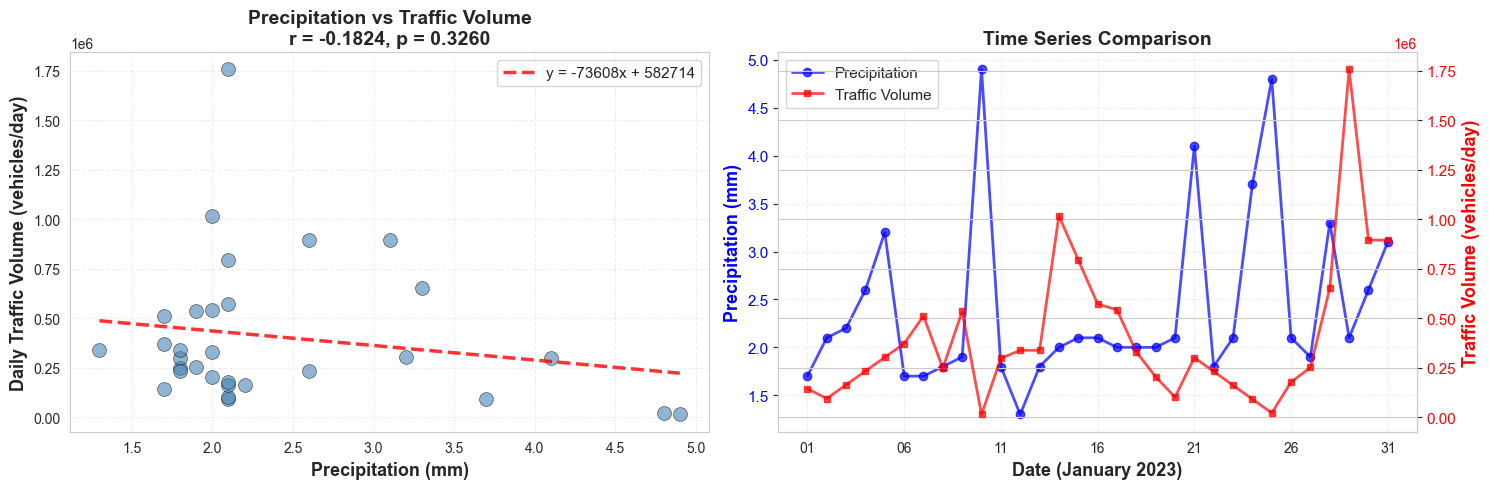

✅ グラフを表示しました


In [10]:
# 散布図と時系列グラフ

import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# ========== 左側：散布図 ==========
ax1.scatter(merged_data_filled['precipitation'], 
           merged_data_filled['daily_total_count'], 
           alpha=0.6, s=100, color='steelblue', edgecolors='black', linewidth=0.5)

ax1.set_xlabel('Precipitation (mm)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Daily Traffic Volume (vehicles/day)', fontsize=13, fontweight='bold')
ax1.set_title(f'Precipitation vs Traffic Volume\nr = {correlation:.4f}, p = {p_value:.4f}', 
             fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='--')

# 回帰直線
z = np.polyfit(merged_data_filled['precipitation'], 
               merged_data_filled['daily_total_count'], 1)
p_fit = np.poly1d(z)
x_line = np.linspace(merged_data_filled['precipitation'].min(), 
                     merged_data_filled['precipitation'].max(), 100)
ax1.plot(x_line, p_fit(x_line), "r--", alpha=0.8, linewidth=2.5, 
        label=f'y = {z[0]:.0f}x + {z[1]:.0f}')
ax1.legend(fontsize=11)

# ========== 右側：時系列グラフ ==========
ax2_twin = ax2.twinx()

# 降水量（青、左軸）
line1 = ax2.plot(range(len(merged_data_filled)), merged_data_filled['precipitation'], 
                'b-o', label='Precipitation', alpha=0.7, linewidth=2, markersize=6)

# 交通量（赤、右軸）
line2 = ax2_twin.plot(range(len(merged_data_filled)), merged_data_filled['daily_total_count'], 
                     'r-s', label='Traffic Volume', alpha=0.7, linewidth=2, markersize=5)

ax2.set_xlabel('Date (January 2023)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Precipitation (mm)', color='b', fontsize=13, fontweight='bold')
ax2_twin.set_ylabel('Traffic Volume (vehicles/day)', color='r', fontsize=13, fontweight='bold')
ax2.set_title('Time Series Comparison', fontsize=14, fontweight='bold')

ax2.tick_params(axis='y', labelcolor='b', labelsize=11)
ax2_twin.tick_params(axis='y', labelcolor='r', labelsize=11)

# x軸を日付に
dates = [d.split('-')[2] for d in merged_data_filled['date']]
ax2.set_xticks(range(0, len(dates), 5))
ax2.set_xticklabels([dates[i] for i in range(0, len(dates), 5)])

ax2.grid(True, alpha=0.3, linestyle='--')

# 凡例を統合
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()

print("✅ グラフを表示しました")

📊 降水量カテゴリ別の交通量比較

              daily_total_count                                         
                          count      mean       std       min        max
rain_category                                                           
小雨 (0.5-2mm)                 10  326153.0  122408.0  143905.0   534117.0
普通の雨 (2-5mm)                 21  443403.0  434029.0   13281.0  1757350.0


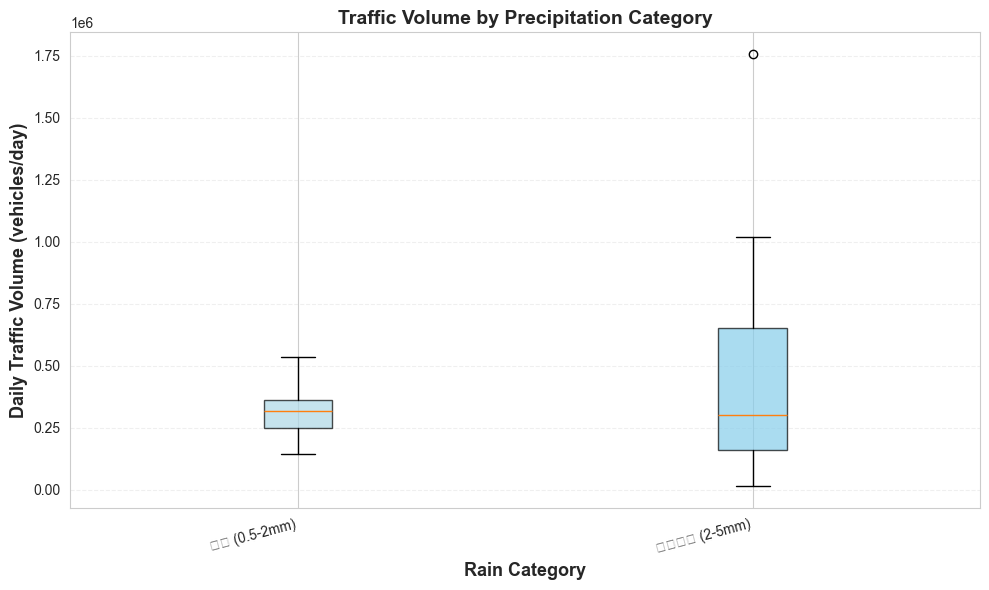

✅ カテゴリ別分析完了


In [11]:
# 降水量をカテゴリ化して比較

print("📊 降水量カテゴリ別の交通量比較")

# カテゴリ化（降水量で分類）
def categorize_rain(precip):
    if precip < 0.5:
        return '晴れ (< 0.5mm)'
    elif precip < 2.0:
        return '小雨 (0.5-2mm)'
    elif precip < 5.0:
        return '普通の雨 (2-5mm)'
    else:
        return '大雨 (>= 5mm)'

merged_data_filled['rain_category'] = merged_data_filled['precipitation'].apply(categorize_rain)

# カテゴリ別統計
category_stats = merged_data_filled.groupby('rain_category').agg({
    'daily_total_count': ['count', 'mean', 'std', 'min', 'max']
}).round(0)

print("\n" + "=" * 60)
print(category_stats)
print("=" * 60)

# 箱ひげ図
plt.figure(figsize=(10, 6))
categories = ['晴れ (< 0.5mm)', '小雨 (0.5-2mm)', '普通の雨 (2-5mm)', '大雨 (>= 5mm)']
data_by_category = [merged_data_filled[merged_data_filled['rain_category'] == cat]['daily_total_count'].values 
                    for cat in categories if cat in merged_data_filled['rain_category'].values]
labels_present = [cat for cat in categories if cat in merged_data_filled['rain_category'].values]

bp = plt.boxplot(data_by_category, labels=labels_present, patch_artist=True)

# 色付け
colors = ['lightblue', 'skyblue', 'steelblue', 'darkblue']
for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.ylabel('Daily Traffic Volume (vehicles/day)', fontsize=13, fontweight='bold')
plt.xlabel('Rain Category', fontsize=13, fontweight='bold')
plt.title('Traffic Volume by Precipitation Category', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

print("✅ カテゴリ別分析完了")

In [12]:
# サマリーレポート

print("=" * 70)
print("📊 天候と交通量の相関分析 - 最終レポート")
print("=" * 70)

print(f"\n【分析期間】")
print(f"  2023年1月1日 〜 2023年1月31日（31日間）")

print(f"\n【データ概要】")
print(f"  気象データ: 31件（毎日）")
print(f"  交通量データ: 23日分（調査日のみ）")
print(f"  欠損日: 8日分を線形補間で補完")

print(f"\n【相関分析結果】")
print(f"  ピアソン相関係数: {correlation:.4f}")
print(f"  P値: {p_value:.4f}")
print(f"  有意性: {'統計的に有意（p < 0.05）' if p_value < 0.05 else '有意ではない（p >= 0.05）'}")

print(f"\n【基本統計】")
print(f"  降水量: 平均 {merged_data_filled['precipitation'].mean():.2f}mm, 範囲 {merged_data_filled['precipitation'].min():.1f}-{merged_data_filled['precipitation'].max():.1f}mm")
print(f"  交通量: 平均 {merged_data_filled['daily_total_count'].mean():.0f}台/日")

print(f"\n【考察】")
if abs(correlation) < 0.3:
    print(f"  降水量と交通量の相関は弱く、降水量だけでは交通量を")
    print(f"  説明することは困難です。他の要因（曜日、イベント、")
    print(f"  気温など）の影響が大きいと考えられます。")
else:
    if correlation < 0:
        print(f"  降水量が増えると交通量が減少する傾向が見られました。")
        print(f"  雨天時に外出を控える行動が反映されている可能性があります。")
    else:
        print(f"  降水量と交通量に正の相関が見られました。")

print("\n" + "=" * 70)

📊 天候と交通量の相関分析 - 最終レポート

【分析期間】
  2023年1月1日 〜 2023年1月31日（31日間）

【データ概要】
  気象データ: 31件（毎日）
  交通量データ: 23日分（調査日のみ）
  欠損日: 8日分を線形補間で補完

【相関分析結果】
  ピアソン相関係数: -0.1824
  P値: 0.3260
  有意性: 有意ではない（p >= 0.05）

【基本統計】
  降水量: 平均 2.41mm, 範囲 1.3-4.9mm
  交通量: 平均 405580台/日

【考察】
  降水量と交通量の相関は弱く、降水量だけでは交通量を
  説明することは困難です。他の要因（曜日、イベント、
  気温など）の影響が大きいと考えられます。

